# ============== Soccer: Live it and Love it ===================
## Analyzed by Marco Lin

![](http://www.blogproductreview.com/wp-content/uploads/2018/10/download-6.jpeg)

 # ===========Objective of the Proposed Research==============

#### - The FIFA World Cup is the biggest single-event sporting competition in the world. And, FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. The company which made this game hold an event call soccer: live it and love it. Because this data base on the real players data. And they want a comprehensive analysis report to predict which team will be the champions, analyze the correlation between different position and skill and recommend a dream team for them. 

#### we will start our analysis from cleaning the data because the columns "Club"," Club logo", "Photo", "Flag", "Loaned. From", "Real face", and "Body type","Height", "Weight” are not used in our analysis. especially, in this data we have many detail data about physical ability, so the height and the weight can be ignored. 

#### Then, we will analyze from Overall score and potential score to each position score for the different purpose. For a golden ball award winner, we will focus on "ST","CB","GK", and "CAM" and compare these with the score of server ability score. for team prediction, we will focus on the average of the ability in each country. The champion team needs a good balance between each teammate. At final, there will be a summary and recommendation for FIFA.

# 1.) =================== Preparation===================

In [1]:
FIFA <- read.csv("~/project-ionic/R/project/data.csv")

In [2]:
FIFA$Height_cm <-as.character(FIFA$Height_cm)

In [3]:
FIFA$Height_cm <-as.numeric(FIFA$Height_cm)

Warning message in eval(expr, envir, enclos):
“強制變更過程中產生了 NA”

In [4]:
FIFA$Weight_kg <-as.character(FIFA$Weight_kg)

In [5]:
FIFA$Weight_kg <-as.numeric(FIFA$Weight_kg)

Warning message in eval(expr, envir, enclos):
“強制變更過程中產生了 NA”

In [6]:
FIFA$potential_value <-as.character(FIFA$potential_value)

In [7]:
FIFA$potential_value <-as.numeric(FIFA$potential_value)

Warning message in eval(expr, envir, enclos):
“強制變更過程中產生了 NA”

In [8]:
FIFA$Position <- as.character(FIFA$Position)

In [9]:
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [10]:
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



# 2.)==================Data Exploration====================

## 2.a )  AGE and Players Correlation

In [11]:
names(FIFA)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Photo"                    "Nationality"             
 [7] "Flag"                     "Overall"                 
 [9] "Potential"                "Club"                    
[11] "Club.Logo"                "potential_value"         
[13] "Value"                    "Salary"                  
[15] "Wage"                     "Special"                 
[17] "Preferred.Foot"           "International.Reputation"
[19] "Weak.Foot"                "Skill.Moves"             
[21] "Work.Rate"                "Body.Type"               
[23] "Real.Face"                "Position"                
[25] "Jersey.Number"            "Joined"                  
[27] "Loaned.From"              "Contract.Valid.Until"    
[29] "feet"                     "inch"                    
[31] "Height_cm"                "Height"                  
[33] "Weight_kg"                "Weight"                  
[35] "LS"                       "ST"                      
[37] "RS"                       "LW"                      
[39] "LF"                       "CF"                      
[41] "RF"                       "RW"                      
[43] "LAM"                      "CAM"                     
[45] "RAM"                      "LM"                      
[47] "LCM"                      "CM"                      
[49] "RCM"                      "RM"                      
[51] "LWB"                      "LDM"                     
[53] "CDM"                      "RDM"                     
[55] "RWB"                      "LB"                      
[57] "LCB"                      "CB"                      
[59] "RCB"                      "RB"                      
[61] "Crossing"                 "Finishing"               
[63] "HeadingAccuracy"          "ShortPassing"            
[65] "Volleys"                  "Dribbling"               
[67] "Curve"                    "FKAccuracy"              
[69] "LongPassing"              "BallControl"             
[71] "Acceleration"             "SprintSpeed"             
[73] "Agility"                  "Reactions"               
[75] "Balance"                  "ShotPower"               
[77] "Jumping"                  "Stamina"                 
[79] "Strength"                 "LongShots"               
[81] "Aggression"               "Interceptions"           
[83] "Positioning"              "Vision"                  
[85] "Penalties"                "Composure"               
[87] "Marking"                  "StandingTackle"          
[89] "SlidingTackle"            "GKDiving"                
[91] "GKHandling"               "GKKicking"               
[93] "GKPositioning"            "GKReflexes"              
[95] "Release.Clause"

Age,Num
21,1423
26,1387
24,1358
22,1340
23,1332
25,1319
20,1240
27,1162
28,1101
19,1024


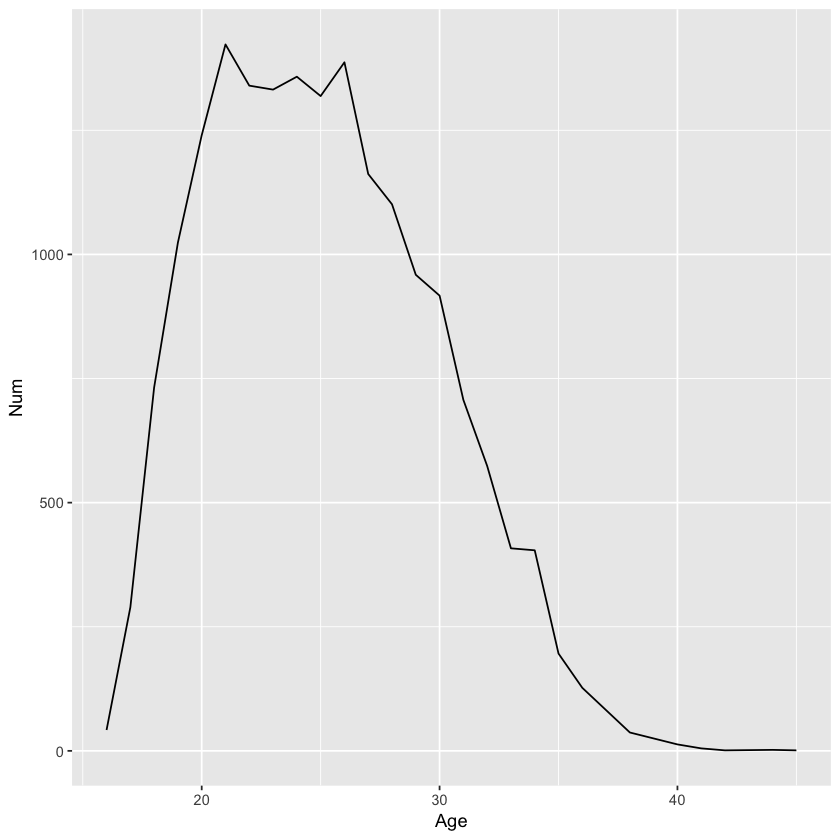

In [12]:
Age_FIFA <- FIFA %>% group_by (Age) %>% summarize (Num = n())

head(Age_FIFA[order(Age_FIFA$Num, decreasing = T), ], 10)

qplot(Age, Num, data = Age_FIFA,
         geom = c("line"))

## Explanation:
### The most all players' age in world cup is in the range 19~26. The highest population in the group of age is 21.  

## 2.b )  Countries and Players Correlation

Nationality,Num
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478
Netherlands,453


[1] 111.0183

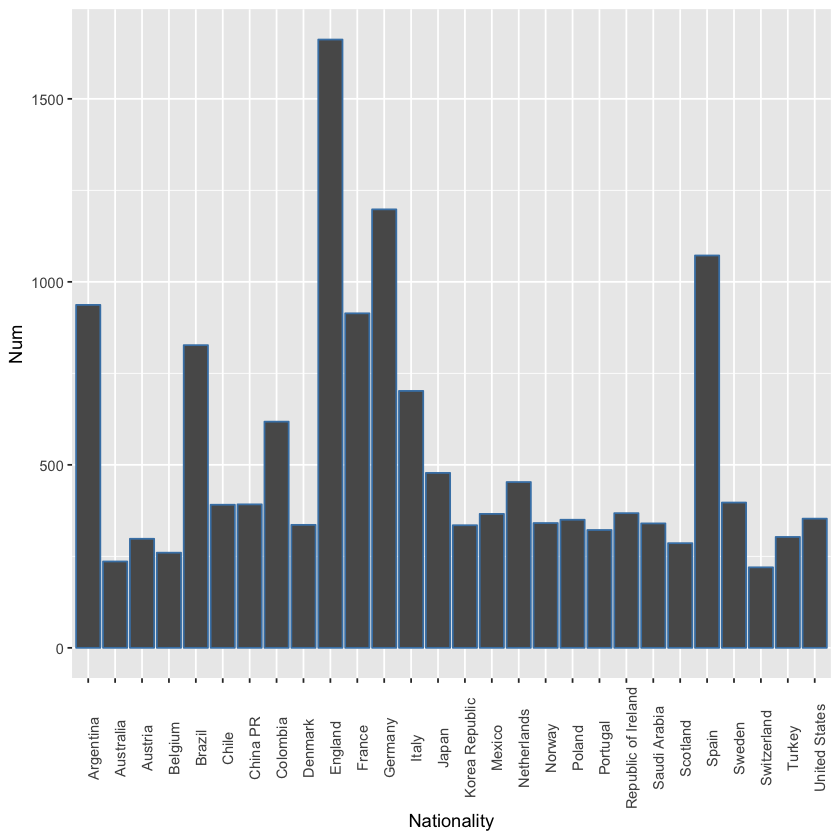

In [13]:
Nationality_FIFA <- FIFA %>% group_by (Nationality) %>% summarize (Num = n())

head(Nationality_FIFA[order(Nationality_FIFA$Num, decreasing = T), ], 10)

mean(Nationality_FIFA$Num)

ANationality_FIFA <- Nationality_FIFA %>% filter(Num >= 200)


ggplot(ANationality_FIFA) + geom_bar(stat = "identity", color = 'steelblue', 
                            aes(x = Nationality, y = Num)) + theme(axis.text.x=element_text(size=rel(1), angle=90))

## Explanation:
### After, We calculate the total number of players in each country, we found the average of number is 111. So, we filter out the total number under 200. In bar chart,  it appears that the players from England, Germany, Spain, Argentina take up most of part.

## 2.c )  Preferred Foot and Players Correlation

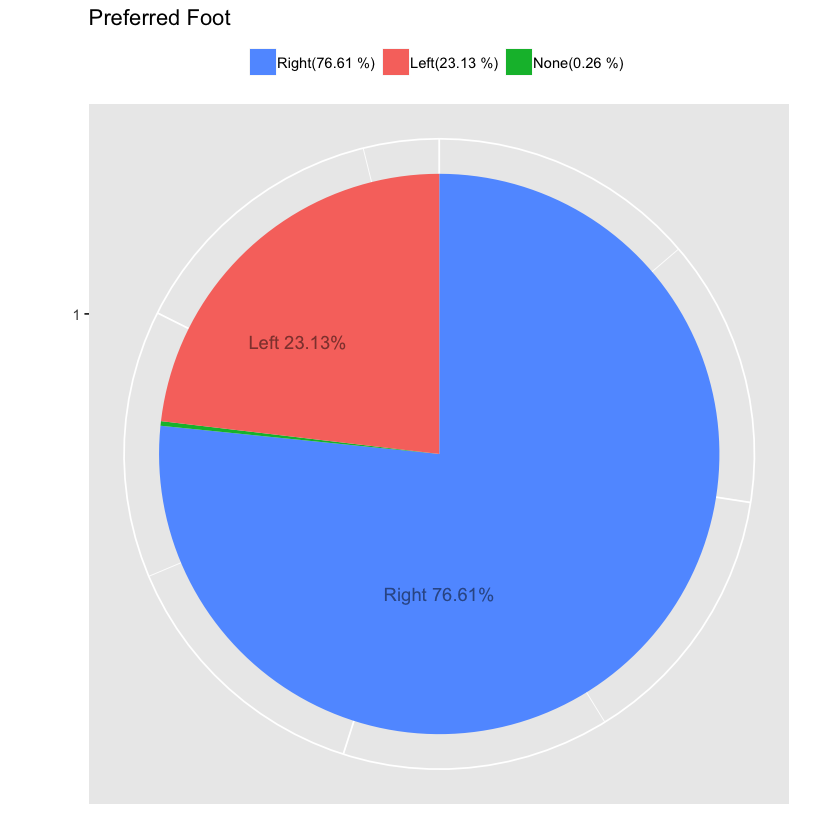

In [14]:
PreferredFoot_FIFA <- FIFA %>% group_by (Preferred.Foot) %>% summarize (Num = n())

foot_pie <- data.frame(foot_pie = c("Left", "Right", "None"),
                      Foot_perc=c(4211,13948,48))
                 foot_pie = foot_pie[order(foot_pie$Foot_perc, decreasing = TRUE),] 
                     myLabel = as.vector(foot_pie$foot_pie)
                    myLabel = paste(myLabel, "(", round(foot_pie$Foot_perc / sum(PreferredFoot_FIFA$Num) * 100, 2), " %) ", sep = "")                       
                 
ggplot((data=foot_pie),aes(x=factor(1), y=Foot_perc, fill=foot_pie)) +
    geom_bar(stat = "identity", width = 1 ) +
    coord_polar("y") +
    labs(x = "", y = "", title = "Preferred Foot") +
    theme(legend.title = element_blank(), legend.position = "top")+
    theme(axis.text.x = element_blank())  +
    scale_fill_discrete(breaks = foot_pie$foot_pie, labels = myLabel)+
    geom_text(x = 0, y = 0, label = "Right 76.61%", alpha = 0.2)+
    geom_text(x = 0.9, y = 40, label = "Left 23.13%                                                        ", alpha = 0.2)

## Explanation:
### Most all of players' preferred foot are right taking up 76%. Left players take up 23% in the pie chart.

## 2.d ) Value Rank

In [15]:
ValueRank <- FIFA %>% select(Name, potential_value, Overall, Jersey.Number, Position) 
head(ValueRank[order(ValueRank$potential_value, decreasing = T), ], 10)


,Name,potential_value,Overall,Jersey.Number,Position
3,Neymar Jr,118.5,92,10,LW
1,L. Messi,110.5,94,10,RF
5,K. De Bruyne,102.0,91,7,RCM
6,E. Hazard,93.0,91,10,LF
16,P. Dybala,89.0,89,21,LF
17,H. Kane,83.5,89,9,ST
26,K. Mbappé,81.0,88,10,RM
8,L. Suárez,80.0,91,9,RS
18,A. Griezmann,78.0,89,7,CAM
2,Cristiano Ronaldo,77.0,94,7,ST


## Explanation:
### The top 5 valuest of soccer players are Neymar, Messi, Bruyne, Hazard, Dybala.


# 3.)==================Data Cleaning====================

In [16]:
names(FIFA)
FIFA <- subset(FIFA, select = -c(Club, Club.Logo, Photo, Flag, Loaned.From, Real.Face, Body.Type, Contract.Valid.Until, Release.Clause, Height,Weight))
names(FIFA)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Photo"                    "Nationality"             
 [7] "Flag"                     "Overall"                 
 [9] "Potential"                "Club"                    
[11] "Club.Logo"                "potential_value"         
[13] "Value"                    "Salary"                  
[15] "Wage"                     "Special"                 
[17] "Preferred.Foot"           "International.Reputation"
[19] "Weak.Foot"                "Skill.Moves"             
[21] "Work.Rate"                "Body.Type"               
[23] "Real.Face"                "Position"                
[25] "Jersey.Number"            "Joined"                  
[27] "Loaned.From"              "Contract.Valid.Until"    
[29] "feet"                     "inch"                    
[31] "Height_cm"                "Height"                  
[33] "Weight_kg"                "Weight"                  
[35] "LS"                       "ST"                      
[37] "RS"                       "LW"                      
[39] "LF"                       "CF"                      
[41] "RF"                       "RW"                      
[43] "LAM"                      "CAM"                     
[45] "RAM"                      "LM"                      
[47] "LCM"                      "CM"                      
[49] "RCM"                      "RM"                      
[51] "LWB"                      "LDM"                     
[53] "CDM"                      "RDM"                     
[55] "RWB"                      "LB"                      
[57] "LCB"                      "CB"                      
[59] "RCB"                      "RB"                      
[61] "Crossing"                 "Finishing"               
[63] "HeadingAccuracy"          "ShortPassing"            
[65] "Volleys"                  "Dribbling"               
[67] "Curve"                    "FKAccuracy"              
[69] "LongPassing"              "BallControl"             
[71] "Acceleration"             "SprintSpeed"             
[73] "Agility"                  "Reactions"               
[75] "Balance"                  "ShotPower"               
[77] "Jumping"                  "Stamina"                 
[79] "Strength"                 "LongShots"               
[81] "Aggression"               "Interceptions"           
[83] "Positioning"              "Vision"                  
[85] "Penalties"                "Composure"               
[87] "Marking"                  "StandingTackle"          
[89] "SlidingTackle"            "GKDiving"                
[91] "GKHandling"               "GKKicking"               
[93] "GKPositioning"            "GKReflexes"              
[95] "Release.Clause"

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Nationality"              "Overall"                 
 [7] "Potential"                "potential_value"         
 [9] "Value"                    "Salary"                  
[11] "Wage"                     "Special"                 
[13] "Preferred.Foot"           "International.Reputation"
[15] "Weak.Foot"                "Skill.Moves"             
[17] "Work.Rate"                "Position"                
[19] "Jersey.Number"            "Joined"                  
[21] "feet"                     "inch"                    
[23] "Height_cm"                "Weight_kg"               
[25] "LS"                       "ST"                      
[27] "RS"                       "LW"                      
[29] "LF"                       "CF"                      
[31] "RF"                       "RW"                      
[33] "LAM"                      "CAM"                     
[35] "RAM"                      "LM"                      
[37] "LCM"                      "CM"                      
[39] "RCM"                      "RM"                      
[41] "LWB"                      "LDM"                     
[43] "CDM"                      "RDM"                     
[45] "RWB"                      "LB"                      
[47] "LCB"                      "CB"                      
[49] "RCB"                      "RB"                      
[51] "Crossing"                 "Finishing"               
[53] "HeadingAccuracy"          "ShortPassing"            
[55] "Volleys"                  "Dribbling"               
[57] "Curve"                    "FKAccuracy"              
[59] "LongPassing"              "BallControl"             
[61] "Acceleration"             "SprintSpeed"             
[63] "Agility"                  "Reactions"               
[65] "Balance"                  "ShotPower"               
[67] "Jumping"                  "Stamina"                 
[69] "Strength"                 "LongShots"               
[71] "Aggression"               "Interceptions"           
[73] "Positioning"              "Vision"                  
[75] "Penalties"                "Composure"               
[77] "Marking"                  "StandingTackle"          
[79] "SlidingTackle"            "GKDiving"                
[81] "GKHandling"               "GKKicking"               
[83] "GKPositioning"            "GKReflexes"

## Explanation:
### I clean the columns: "Club","Club logo","Photo","Flag","Loaned.From","Realface",and "Bodytype" which are not useful for our analysis.

# 4.)===================Adaptation====================

In [17]:
FIFA<-within(FIFA,{ Score<- as.integer(Potential)-as.integer(Overall)})

FIFA_Score <- select(FIFA, Name, Potential, Overall, Score, Age)
head(FIFA_Score[order(FIFA_Score$Score, decreasing = T), ], 10)

,Name,Potential,Overall,Score,Age
16029,J. von Moos,84,58,26,17
18073,D. Campbell,76,50,26,17
16630,Y. Lenze,82,57,25,17
17176,B. Mumba,80,55,25,16
17785,K. Askildsen,77,52,25,17
13928,A. Dabo,86,62,24,17
15729,G. Azzinnari,83,59,24,17
16817,I. Sauter,80,56,24,17
18045,K. Lara,74,50,24,16
18051,E. Destanoglu,74,50,24,17


## Explanation:
### We have create a Score column which is made by potencial score cut overall score that allows us to understand the possibility of each player easily. And, we found the player who has highest score is J. von Moos. It appears that the score has correlation with age.
![](https://images.performgroup.com/di/library/GOAL/ef/9c/julian-von-moos-fc-basel_s4184pkw7bf613yl6xd2ic0n6.jpg?t=1748081686)

# ===================Best Squared===========================

# 4-3-3 formation
### This formation is most common formation in soccer games. So, my analysis foucus on this formation.

![](https://www.thoughtco.com/thmb/hAZomoxXf7I44B9BSZrk3-GNQII=/600x849/filters:fill(auto,1)/Association_football_4_3_3_formation-588fc84e5f9b5874ee616671.jpg)

### list of abbreviations of Soccer position.

### Defensive: 
#### GK = Goalkeeper 
#### SW = Sweeper 
#### RWB = Right Wing Back 
#### RB = Right back
#### RCB = Right center back 
#### CB = Center back
#### LCB = Left center back 
#### LB = Left back 
#### LWB = Left Wing Back 

### Midfielders:
#### RDM = Right defensive midfield
#### RCDM = Right center defensive midfield
#### CDM = Center defensive midfield
#### LCDM = Left center defensive midfield
#### LDM = Left defensive midfield
#### RWM = Right Wing Midfield
#### RM = Right midfield
#### RCM = Right center midfield 
#### CM = Center Midfield 
#### LCM = Left center midfield 
#### LM = Left midfield 
#### LWM = Left Wing Midfield
#### RAM = Right attacking midfield
#### RCAM = Right center attacking midfield
#### CAM = Center attacking midfield
#### LCAM = Left center attacking midfield
#### LAM = Left attacking midfield

### Forwards:
#### RF = Right forward
#### CF = Center forward
#### LF = Left forward
#### RS = Right Striker
#### ST = Striker
#### LS = Left Striker

### In this formation, we need a GK, a ST, a (LS or LW or LF), a (RS or RW or RF) in defensive position, a RAM, a LAM, a CM, a RWB, a LWB, CB. 

## Explanation: I sperated the position into different part of formation to calculate the average of score in each position.

In [18]:
#GOALKeep

GoalKeeper_position<- FIFA %>% filter(Position == "GK") %>% 
select (Name, Nationality, Overall, Score, Position)
head(GoalKeeper_position)

#forward_position
forward_position<- FIFA %>% filter(Position == "LS" | Position == "RS" | Position == "LW" | Position == "RW" |  
                          Position == "ST" |  Position == "LF" |  Position == "RF" |  Position == "CF") %>% 
select (Name, Nationality, Overall, Score, Position)
head(forward_position[order(forward_position$Overall, decreasing = T), ],10)


#Midfield_position
Midfield_position<- FIFA %>% filter( Position == "RAM" | Position == "LCM" | Position == "RCM" |
                          Position == "RM" |  Position == "LM" |  Position == "CM" |  Position == "CAM" |  
                                    Position == "LDM" | Position == "CDM" |  Position == "RDM")  %>% 
select (Name, Nationality, Overall, Score, Position)
head(Midfield_position[order(Midfield_position$Overall, decreasing = T), ],10)


#Back_position
Back_position<- FIFA %>% filter(Position == "LWB" | Position == "RWB" | Position == "CB" | Position == "RCB" |  
                          Position == "LCB" |  Position == "LB" |  Position == "RB") %>% 
select (Name, Nationality, Overall, Score, Position)

head(Back_position[order(Back_position$Overall, decreasing = T), ],10)

Name,Nationality,Overall,Score,Position
De Gea,Spain,91,2,GK
J. Oblak,Slovenia,90,3,GK
M. ter Stegen,Germany,89,3,GK
T. Courtois,Belgium,89,1,GK
M. Neuer,Germany,89,0,GK
H. Lloris,France,88,0,GK


Name,Nationality,Overall,Score,Position
L. Messi,Argentina,94,0,RF
Cristiano Ronaldo,Portugal,94,0,ST
Neymar Jr,Brazil,92,1,LW
E. Hazard,Belgium,91,0,LF
L. Suárez,Uruguay,91,0,RS
R. Lewandowski,Poland,90,0,ST
P. Dybala,Argentina,89,5,LF
H. Kane,England,89,2,ST
E. Cavani,Uruguay,89,0,LS
S. Agüero,Argentina,89,0,ST


Name,Nationality,Overall,Score,Position
K. De Bruyne,Belgium,91,1,RCM
L. Modrić,Croatia,91,0,RCM
T. Kroos,Germany,90,0,LCM
David Silva,Spain,90,0,LCM
N. Kanté,France,89,1,LDM
A. Griezmann,France,89,1,CAM
Sergio Busquets,Spain,89,0,CDM
K. Mbappé,France,88,7,RM
M. Salah,Egypt,88,1,RM
Casemiro,Brazil,88,2,CDM


Name,Nationality,Overall,Score,Position
Sergio Ramos,Spain,91,0,RCB
D. Godín,Uruguay,90,0,CB
G. Chiellini,Italy,89,0,LCB
M. Hummels,Germany,88,0,LCB
Marcelo,Brazil,88,0,LB
Thiago Silva,Brazil,88,0,RCB
S. Umtiti,France,87,5,CB
K. Koulibaly,Senegal,87,3,LCB
Jordi Alba,Spain,87,0,LB
J. Vertonghen,Belgium,87,0,LCB


In [19]:
squa433 <- data.frame(Name=c("De Gea","L. Messi","Cristiano Ronaldo","Neymar Jr",
                             "K. De Bruyne","T. Kroos","A. Griezmann","S. Umtiti","G. Chiellini","D. Godín","Sergio Ramos"),
                      Natioanlity=c("Spain","Argentina","Portugal","Brazil",
                                    "Belgium","Germany","France","France","Italy","Uruguay","Spain"),
                      Overall=c(91,94,94,92,91,90,89,87,89,90,91),
                      Position=c("GK","RF","ST","LW","RCM","LCM","CAM","CB","LCB","CB","RCB"))
squa433
mean(squa433$Overall)

Name,Natioanlity,Overall,Position
De Gea,Spain,91,GK
L. Messi,Argentina,94,RF
Cristiano Ronaldo,Portugal,94,ST
Neymar Jr,Brazil,92,LW
K. De Bruyne,Belgium,91,RCM
T. Kroos,Germany,90,LCM
A. Griezmann,France,89,CAM
S. Umtiti,France,87,CB
G. Chiellini,Italy,89,LCB
D. Godín,Uruguay,90,CB


[1] 90.72727

## Explanation: The best squared's average of overall score is 90. This is the dream team.

# ===================Champion===========================

In [20]:
Nationality_team <- FIFA %>% filter(Overall > 80) %>% group_by(Nationality) %>% summarize("Average_team_Score" = sum(Overall))

head(Nationality_team[order(Nationality_team$Average_team_Score, decreasing = T), ], 10)

Nationality,Average_team_Score
Spain,5174
Brazil,4272
France,3260
Germany,2931
Italy,2495
Argentina,1681
Portugal,1663
Belgium,1283
England,1243
Croatia,920


## Explanation: I droped the player whose score is lower than 80, then seperate into different Nationality group to get the rank of average of score of countries. Then, we can focus to analysis with this contries

# 1. Spain

In [21]:
Nationality_team_Brazil <- FIFA %>% filter(Overall > 82 &  Nationality =="Brazil" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Brazil
mean(Nationality_team_Brazil$Average_Score)

Position,Average_Score
CAM,84.00000
CB,85.00000
CDM,86.00000
GK,84.66667
LB,85.75000
LCB,83.00000
LCM,83.00000
LDM,84.00000
LM,84.50000
LW,90.00000


[1] 84.55

# 2. France

In [22]:
Nationality_team_France <- FIFA %>% filter(Overall > 82 &  Nationality =="France" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_France
mean(Nationality_team_France$Average_Score)

Position,Average_Score
CAM,86.0
CB,87.0
CM,83.0
GK,85.0
LCB,83.5
LDM,89.0
LM,83.5
LW,84.0
RCB,86.0
RDM,87.0


[1] 85.23077

# 3. Spain

In [23]:
Nationality_team_Spain <- FIFA %>% filter(Overall > 82 &  Nationality =="Spain" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Spain
mean(Nationality_team_Spain$Average_Score)

Position,Average_Score
CB,83.00000
CDM,86.00000
CM,84.50000
GK,84.80000
LB,85.00000
LCM,90.00000
LF,86.00000
LM,85.00000
LS,84.00000
LW,88.00000


[1] 85.11569

# 4.Germany

In [24]:
Nationality_team_Germany <- FIFA %>% filter(Overall > 82 &  Nationality =="Germany" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Germany
mean(Nationality_team_Germany$Average_Score)

Position,Average_Score
CAM,86.00000
CB,83.50000
CM,83.33333
GK,85.16667
LCB,88.00000
LCM,90.00000
LM,86.00000
LW,86.00000
RB,83.00000
RCB,85.00000


[1] 85.15385

# 5. Belgum

In [25]:
Nationality_team_Belgium <- FIFA %>% filter(Overall > 82 &  Nationality =="Belgium" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Belgium
mean(Nationality_team_Belgium$Average_Score)

Position,Average_Score
CAM,85
CB,85
CM,83
GK,89
LCB,87
LCM,84
LF,91
LM,83
RCB,86
RCM,91


[1] 86.5

# 6.Argentina

In [26]:
Nationality_team_Argentina <- FIFA %>% filter(Overall > 82 &  Nationality =="Argentina" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Argentina
mean(Nationality_team_Argentina$Average_Score)

Position,Average_Score
CB,85
CDM,84
LF,89
LS,86
RF,94
RM,84
ST,88


[1] 87.14286

# 7. England

In [27]:
Nationality_team_England <- FIFA %>% filter(Overall > 82 &  Nationality =="England" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_England
mean(Nationality_team_England$Average_Score)


Position,Average_Score
GK,83
LCM,84
RB,84
RCB,83
RW,86
ST,89


[1] 84.83333

# 8.Portugal 

In [28]:
Nationality_team_Portugal <- FIFA %>% filter(Overall > 82 &  Nationality =="Portugal" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Portugal
mean(Nationality_team_Portugal$Average_Score)



Position,Average_Score
CDM,83.5
GK,83.5
LCM,83.5
RCB,85.0
RM,84.0
RW,86.0
ST,94.0


[1] 85.64286

# 9.Italy 

In [29]:
Nationality_team_Italy <- FIFA %>% filter(Overall > 82 &  Nationality =="Italy" ) %>% group_by(Position) %>% summarize("Average_Score" = mean(Overall))
Nationality_team_Italy
mean(Nationality_team_Italy$Average_Score)

Position,Average_Score
CB,83.5
CM,84.0
GK,86.0
LCB,89.0
LCM,86.0
LS,83.0
LW,88.0
RCB,86.0
RDM,83.0
ST,87.0


[1] 85.55

## Rank

In [30]:
Champions_predict <- data.frame(
                      Natioanlity=c("England","Argentina","Portugal","Brazil",
                                    "Belgium","Germany","France","Spain","Italy"),
                      Overall=c(84.833,87.142,85.642,84.55,86.5,85.153,85.23,85.115,85.55))
                    

head(Champions_predict[order(Champions_predict$Overall, decreasing = T), ], 8)



,Natioanlity,Overall
2,Argentina,87.142
5,Belgium,86.500
3,Portugal,85.642
9,Italy,85.550
7,France,85.230
6,Germany,85.153
8,Spain,85.115
1,England,84.833


## Explanation: it appears that the Argentina will be the next champion.

# 5.)===============Simple Linear Regression====================

### a. Potential capability


Call:
lm(formula = Score ~ Age, data = FIFA)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2057 -2.1869 -0.1994  1.7985 14.8507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.243294   0.110668   273.3   <2e-16 ***
Age         -1.002089   0.004331  -231.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.729 on 18205 degrees of freedom
Multiple R-squared:  0.7462,	Adjusted R-squared:  0.7462 
F-statistic: 5.353e+04 on 1 and 18205 DF,  p-value: < 2.2e-16


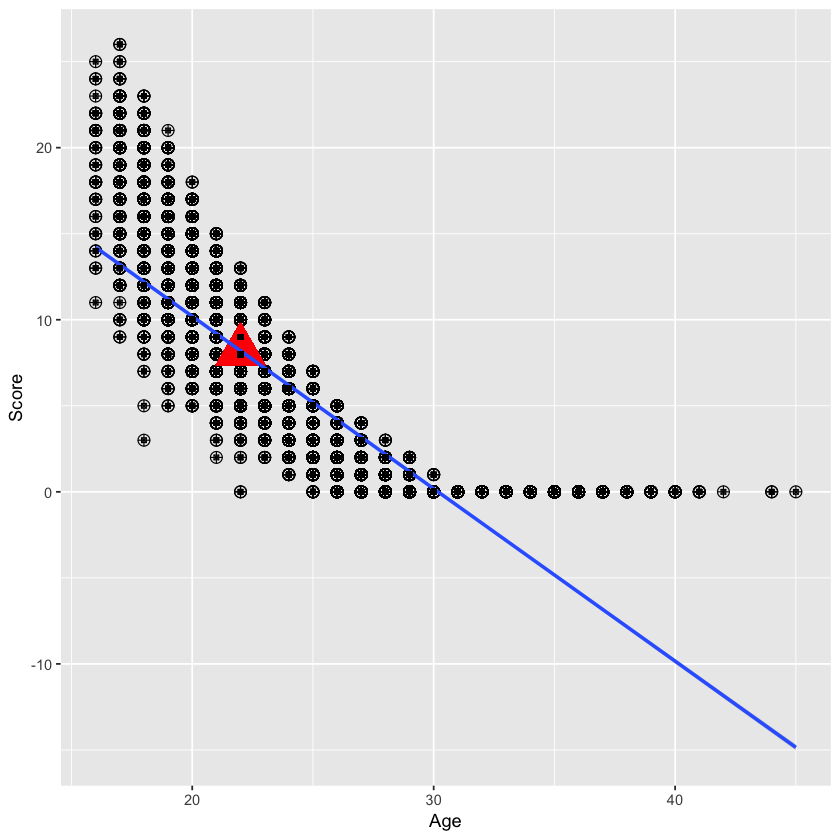

In [31]:
ScoreLM <- lm(Score ~ Age, data = FIFA) 
summary(ScoreLM)

new <- data.frame(Age = 22) 
result <- predict(ScoreLM, newdata = new) 


ggplot(FIFA, aes(x = Age , y = Score )) +geom_point(shape = 10, size = 3) + 
geom_point(x = new$Age, y = result, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Age", y = "Score") 

## Explanation:
### After we analyze the Score(overall - potential) which means the player who has higher score is higher potential, we found younger player has higher chance to inspire their potential. On the other hand, the older player has stable performance in matches.

### b. CAM position and Curve Correlation 

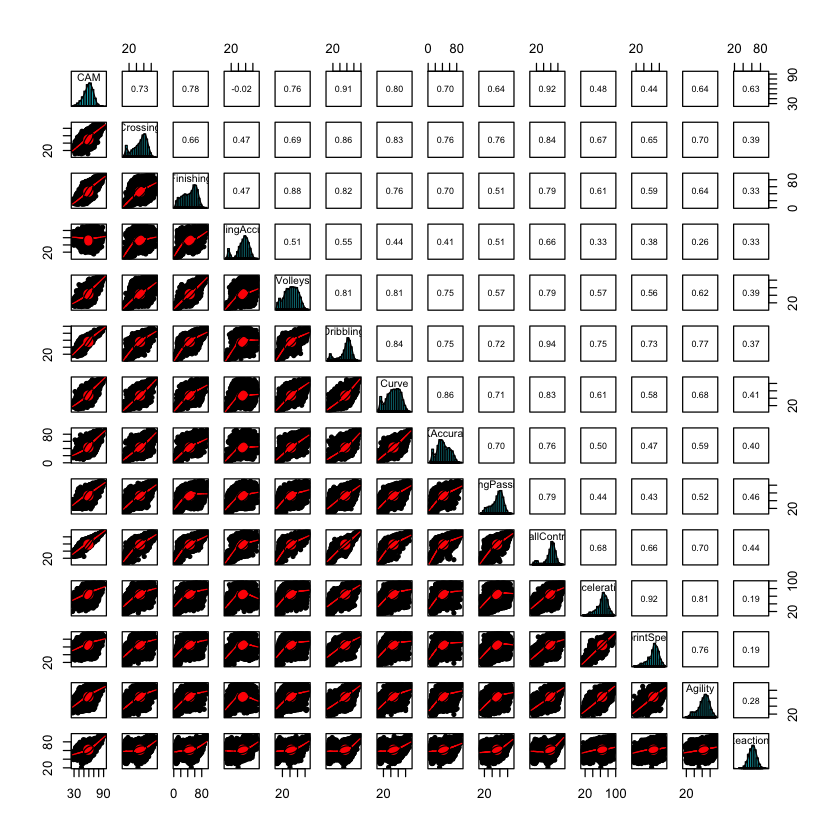

In [32]:
correlation<- select(FIFA, CAM,
                     Crossing,Finishing,HeadingAccuracy,ShortPassing,
                        Volleys,Dribbling,Curve,FKAccuracy,
                        LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions)

pairs.panels(correlation[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)


Call:
lm(formula = CAM ~ Curve, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.4398  -3.6287   0.0726   3.7593  23.5206 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.718114   0.163979   199.5   <2e-16 ***
Curve        0.512443   0.003068   167.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.9 on 16120 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.6338,	Adjusted R-squared:  0.6337 
F-statistic: 2.79e+04 on 1 and 16120 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2085 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”

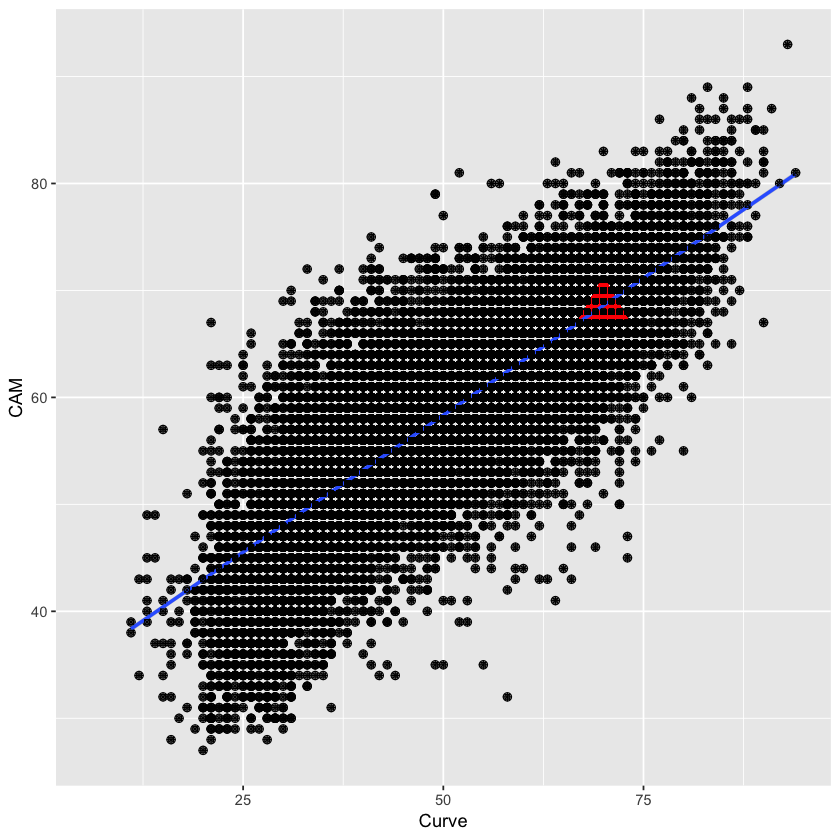

In [33]:
model2 <- lm(CAM ~ Curve, data = FIFA) 
summary(model2)

new2 <- data.frame(Curve = 70) 
result2 <- predict(model2, newdata = new2) 


ggplot(FIFA, aes(x = Curve , y = CAM )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new2$Curve, y = result2, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Curve", y = "CAM") 

## Explanation:
### CAM position Score has correlation with Curve Score. The R squared value is up to 0.6. So, it appears that the player in CAM (central attack midfield) position needs has a good curve skill.

### c. ST position and Dribbling Correlation

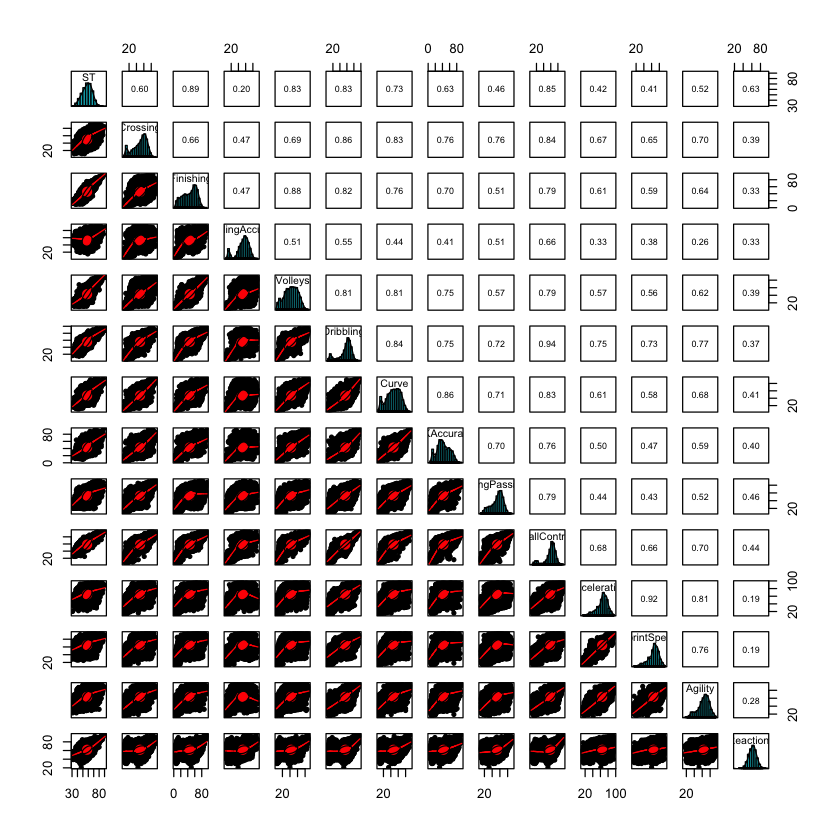

In [34]:
correlation<- select(FIFA, ST,
                     Crossing,Finishing,HeadingAccuracy,ShortPassing,
                        Volleys,Dribbling,Curve,FKAccuracy,
                        LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions)

pairs.panels(correlation[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)


Call:
lm(formula = ST ~ Dribbling, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.8756  -3.3132  -0.0005   3.3119  21.2287 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.208556   0.197896   107.2   <2e-16 ***
Dribbling    0.604173   0.003199   188.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.081 on 16120 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.6888,	Adjusted R-squared:  0.6888 
F-statistic: 3.568e+04 on 1 and 16120 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2085 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”

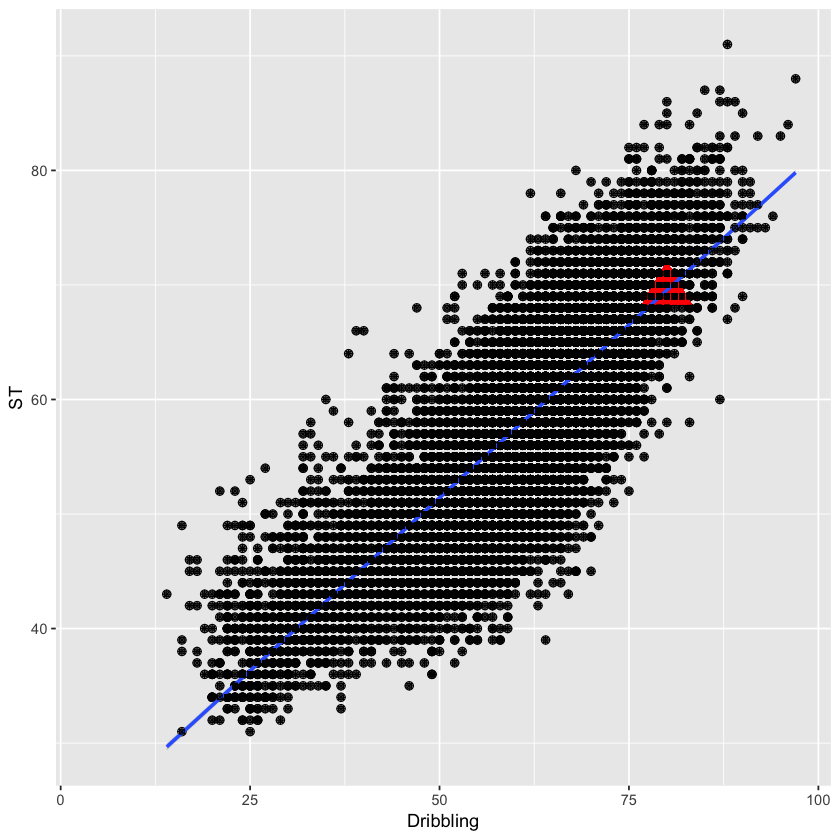

In [35]:
model3 <- lm(ST ~Dribbling , data = FIFA) 
summary(model3)

new3 <- data.frame(Dribbling = 80) 
result3 <- predict(model3, newdata = new3) 


ggplot(FIFA, aes(x = Dribbling , y = ST )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new3$Dribbling, y = result3, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Dribbling", y = "ST") 

## Explanation:
### Strike position Score has correlation with Dribbling Score. The R squared value is up to 0.6. So, it appears that the player in Strike position needs has a good Dribbling skill.

### d. Strike position and Finishing score Correlation


Call:
lm(formula = ST ~ Finishing, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9179  -2.8295  -0.0357   2.7074  18.4422 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.300934   0.106502   312.7   <2e-16 ***
Finishing    0.492633   0.002033   242.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.227 on 16120 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7846 
F-statistic: 5.872e+04 on 1 and 16120 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2085 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”

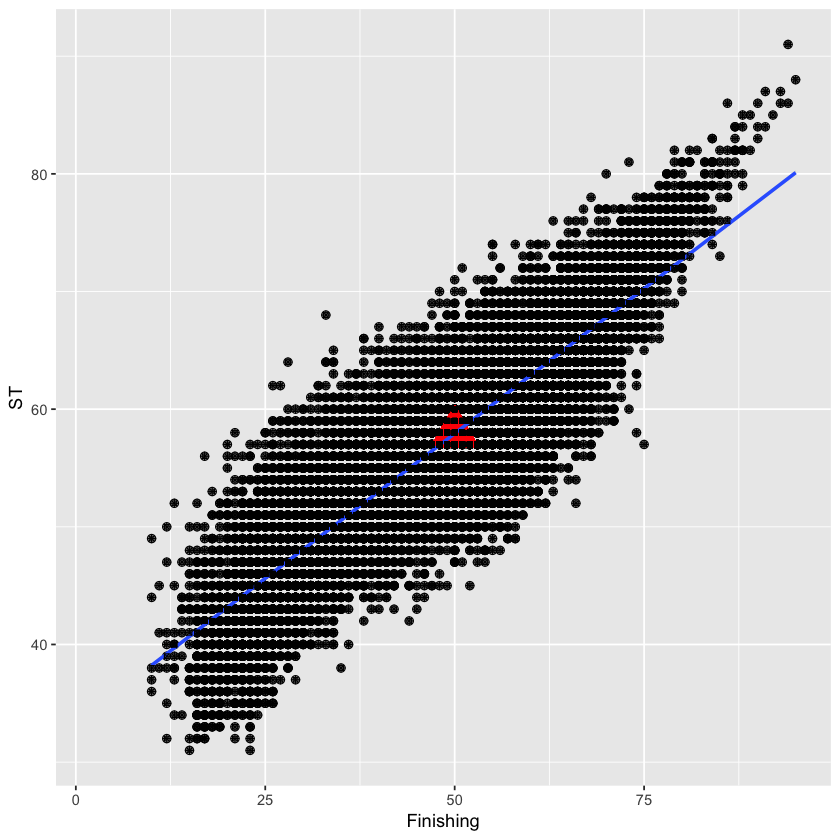

In [36]:
model4 <- lm(ST ~ Finishing, data = FIFA) 
summary(model4)

new4 <- data.frame(Finishing = 50) 
result4 <- predict(model4, newdata = new4) 


ggplot(FIFA, aes(x = Finishing , y = ST )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new4$Finishing, y = result4, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Finishing", y = "ST") 

## Explanation:
### Strike position Score has correlation with Finishing Score. The R squared value is up to 0.6. So, it appears that the player in Strike position needs has a good Finishing skill.

### e. Strike position and BallControl Score Correlation


Call:
lm(formula = ST ~ BallControl, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9822  -3.2698   0.0292   3.3508  24.6034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.144035   0.243994   37.48   <2e-16 ***
BallControl 0.770103   0.003813  201.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.848 on 16120 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.7167,	Adjusted R-squared:  0.7167 
F-statistic: 4.079e+04 on 1 and 16120 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2085 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”

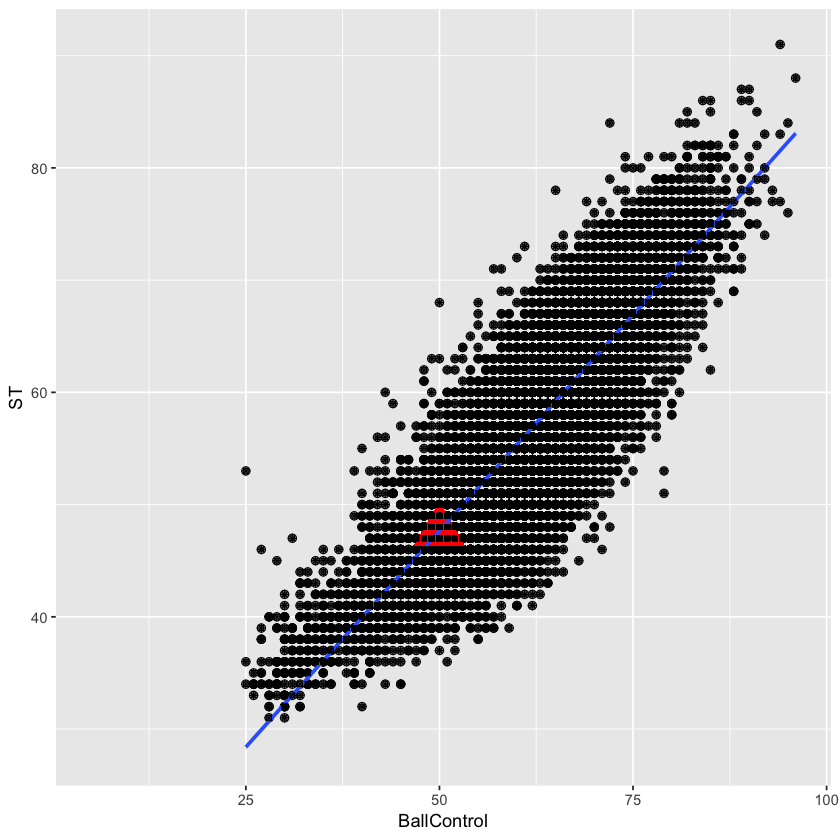

In [37]:
model5 <- lm(ST ~ BallControl, data = FIFA) 
summary(model5)

new5 <- data.frame(BallControl = 50) 
result5 <- predict(model5, newdata = new5) 


ggplot(FIFA, aes(x = BallControl , y = ST )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new5$BallControl, y = result5, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "BallControl", y = "ST") 

## Explanation:
### Strike position Score has correlation with BallControl Score. The R squared value is up to 0.6. So, it appears that the player in Strike position needs has a good BallControl skill.

# 6.)============Multiple Linear Regression====================

### a. Stirke

In [38]:
StikeMuLiRe <- lm(ST ~  BallControl +Finishing+Dribbling, data = FIFA) 
summary(StikeMuLiRe)


Call:
lm(formula = ST ~ BallControl + Finishing + Dribbling, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3119  -1.7757   0.0704   1.7948  11.1555 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.818836   0.136828  108.30   <2e-16 ***
BallControl  0.380569   0.003999   95.17   <2e-16 ***
Finishing    0.311816   0.001815  171.83   <2e-16 ***
Dribbling    0.056569   0.003453   16.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.651 on 16118 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.9153,	Adjusted R-squared:  0.9153 
F-statistic: 5.807e+04 on 3 and 16118 DF,  p-value: < 2.2e-16


## Explanation:
### it appears that the ballcontrol, finishing, and dribbling can affect the Strike position

### b. Goal Keeper

In [39]:
GKPlayer <- lm(GKPositioning ~  GKDiving +GKHandling+GKKicking+GKReflexes, data = FIFA) 
summary(GKPlayer)


Call:
lm(formula = GKPositioning ~ GKDiving + GKHandling + GKKicking + 
    GKReflexes, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0124  -2.5030   0.0032   2.5034  20.0922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.274385   0.035414   7.748 9.84e-15 ***
GKDiving    0.249895   0.007261  34.418  < 2e-16 ***
GKHandling  0.276458   0.007274  38.007  < 2e-16 ***
GKKicking   0.198950   0.006854  29.029  < 2e-16 ***
GKReflexes  0.251408   0.007198  34.927  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.378 on 18154 degrees of freedom
  (48 observations deleted due to missingness)
Multiple R-squared:  0.9607,	Adjusted R-squared:  0.9607 
F-statistic: 1.109e+05 on 4 and 18154 DF,  p-value: < 2.2e-16


## Explanation:
### it appears that the GKDiving, GKReflexes, GKHandling, and GKKicking are inportant skill for goal keepers. 

## c. Central Attack Midfield

In [40]:
CAMplayer <- lm(CAM ~  BallControl +Finishing+Curve, data = FIFA) 
summary(CAMplayer)


Call:
lm(formula = CAM ~ BallControl + Finishing + Curve, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1063  -1.5700   0.1379   1.7090  13.4916 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.980396   0.139960   49.87   <2e-16 ***
BallControl 0.600602   0.003258  184.33   <2e-16 ***
Finishing   0.157291   0.001747   90.05   <2e-16 ***
Curve       0.121293   0.002084   58.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.662 on 16118 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.9254,	Adjusted R-squared:  0.9254 
F-statistic: 6.669e+04 on 3 and 16118 DF,  p-value: < 2.2e-16


## Explanation:
### it appears that the BallControl, Finishing, and Curve are inportant skill for central attack midfield. 

## d. Central Back

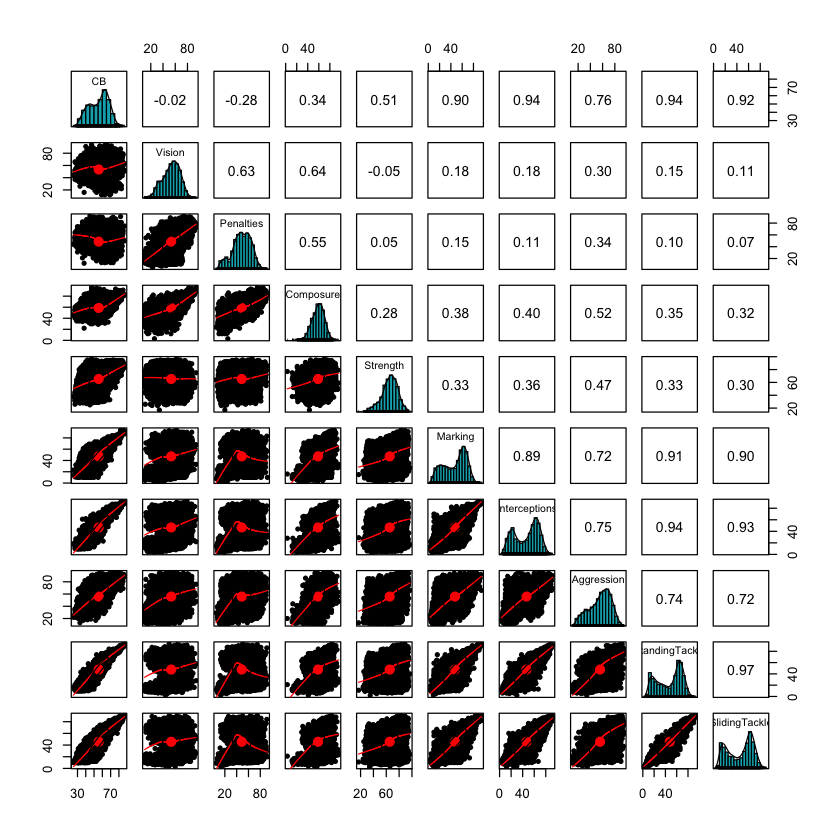

In [41]:
correlation<- select(FIFA, CB,
                     Vision,Penalties,Composure,Stamina,Strength,Marking,Interceptions,Aggression,StandingTackle,
                    SlidingTackle)

pairs.panels(correlation[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)

In [42]:
CBplayer <- lm(CB ~  Interceptions+Marking+StandingTackle+SlidingTackle, data = FIFA) 
summary(CBplayer)


Call:
lm(formula = CB ~ Interceptions + Marking + StandingTackle + 
    SlidingTackle, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8627  -1.9557  -0.0014   1.8917  12.5823 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    23.055172   0.074268 310.432   <2e-16 ***
Interceptions   0.242164   0.003441  70.386   <2e-16 ***
Marking         0.178942   0.002882  62.080   <2e-16 ***
StandingTackle  0.212328   0.005431  39.095   <2e-16 ***
SlidingTackle   0.002866   0.004836   0.593    0.553    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.975 on 16117 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.9354,	Adjusted R-squared:  0.9354 
F-statistic: 5.833e+04 on 4 and 16117 DF,  p-value: < 2.2e-16


# 7.)==================Summary====================

### The range of player age is from 20 to 26. It appears that the number of players who is 21 years old is over 1400. And next, the nationality rank appears that up to 1600 players come from England. And then is Germany and Spain. Next, up to 76 percent players preferred foot is right. Only 23 percent players use left foot. In the valuable players rank, you can see the most valuable player is Neymar and then is Messi and the third is bruyne.
### Then, I did some adaption. Because in this dataset, there is two columns: Overall score and potential score. After, the potential score column minus overall score column, I got the potential growth score. This score can allow us to understand easily the players possible developments in the future. The table shows that the players who have higher score are young. Only 17 or 16. 
### in linear regression, I analyze the correlation between age and potential growth. The R squared value up to 0.7. So, the formula appears that there is a correlation between this two. More young more potential growth score. Next, there is some explanation of position. This is list of abbreviations. In soccer, we have different formations, this is a common one in soccer game. Then, we can separate the ground into three different part. Forward, Midfield, and back or defensive. In each part we have several position like in defensive we have goal keeper, sweeper, left central back. In forward, strike, right strike. We have 32 different positions, I choose one position in each part to predict. 
### First one I chose strike. In this plot, I use ball control, finishing, dribbling to make simple linear regression, it appears that strike position has correlation with this three factors. So, we can say the player in this position need to good at ball control, finishing, and dribbling. Moreover, we also use this three to make multiple linear regression. I found the this formula R squared is up to 0.91. It’s a good formula to predict strike. So, in the same way, I found four formula with high R-squared for different positions. Central attack midfield players need good ball control, finishing, and curve. Central back need good interception, marking, standing tackle, and sliding tackle. The last formula for goal keeper has up to 0.96 R squared. Goal keeper need to have good diving, handing, kicking, and reflexes skill. Those formula allows us to predict which player is suitable on which position. 
### The last part, the best squared. Like we said before, we analyze the common formation 4-3-3. We need three in midfield, three for forward, and four for defensives. I separated the positions into different group. And choose the players the formation need from each rank. This is our dream team. And the next, the most important part is which national team will be the next champion. I analyze the average of team score. Then, I pick up top nine nationality to analyze, I calculated average score in different position. Here is the final average score. According to that score, the champion will be Argentina. 

# 8.)=================Report====================

![]("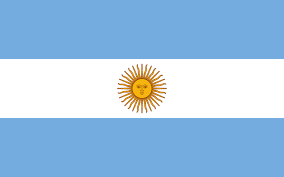")

![]("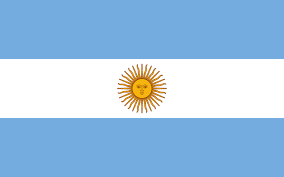")

### The best squared 
1. GK   - De Gea                From Spain
2. RF    - L. Messi              From Argentina
3. ST    -Cristiano Ronaldo  From  Portugal
4. LW   -Neymar Jr             From Brazil
5. RCM -K. De Bruyne         From Belgium
6. LCM -T. Kroos                From Germany
7. CAM -A. Griezmann         From France
8. CB    -S. Umtiti               From France
9. LCB  -G. Chiellini            From Italy
10. CB    -D. Godín               From Uruguay
11. RCB  -Sergio Ramos       From Spain

### The next champion will be
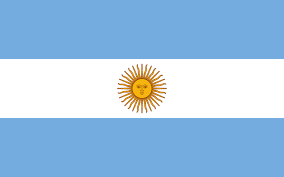